In [1]:
import numpy as np
import DDM_util as util
import matplotlib.pyplot as plt
import networkx as nx
from IPython import display
%matplotlib inline

In [2]:
title_fontsize = 20

In [3]:
def coupled_update(x, mu, k, L, dt, sigma):
    assert(x.shape[0] == L.shape[0] == L.shape[1] == sigma.shape[0])
    assert(x.shape[1] == 1)
    num_individuals = x.shape[0]
    return x - (k * x - k * mu + np.matmul(L, x)) * dt

def run_simulation(x0, mu, k, L, dt, sigma, T, leaderindex=None, animate=False, title=None, savename=None, ylim=None):
    num_individuals = x0.shape[0]
    num_timesteps = int(T/dt)
    xtick_spacing = int(num_timesteps / 10)
    t_vals = np.arange(0, T, xtick_spacing * dt)
    x = np.empty([num_individuals, num_timesteps])
    x[:,0] = np.squeeze(x0)
    for i in range(num_timesteps-1):
        x[:,i+1] = np.squeeze(coupled_update(np.expand_dims(x[:,i], axis=1), mu, k, L, dt, sigma))
        if animate:
            plt.plot(x[:,:i+1].T)
            plt.xlim([0, num_timesteps])
            plt.xticks(t_vals)
            # plt.ylim([-10, 10])
            plt.ylabel("x")
            plt.xlabel("t")
            plt.xticks(range(0, num_timesteps, xtick_spacing), t_vals)
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(0.0001)
    util.plot_unique_trajectories(x, range(num_individuals), leaderindex)
    plt.plot(np.sum(x, axis=0), label=r"$\sum x_i$", linestyle=':', color='k')
    plt.xlim([0, num_timesteps])
    ylim = ylim if ylim else np.max(np.absolute(x)) * 1.1
    plt.ylim([-ylim, ylim])
    plt.ylabel("x", fontsize=axis_fontsize)
    plt.xlabel("t", fontsize=axis_fontsize)
    plt.xticks(range(0, num_timesteps, xtick_spacing), t_vals)
    legend = plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize = legendlabel_fontsize)
    plt.setp(legend.get_title(),fontsize=legendtitle_fontsize)
    if title:
        plt.title(title, fontsize=title_fontsize)
    if savename:
        plt.savefig(figure_path + savename, bbox_inches="tight")
    return x

axis_fontsize = 12
title_fontsize = 20
legendtitle_fontsize = 16
legendlabel_fontsize = 14

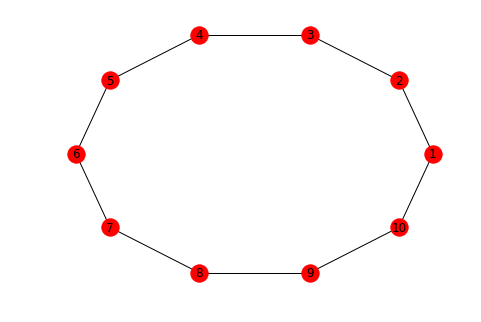

In [4]:
num_individuals = 10
L = util.create_circle_graph(num_individuals)
util.draw_circle_graph(L)
x0 = np.zeros([num_individuals, 1])
sigma = np.zeros([num_individuals, 1])
dt = 0.001
T = 30
mu = 2

## Homogeneous

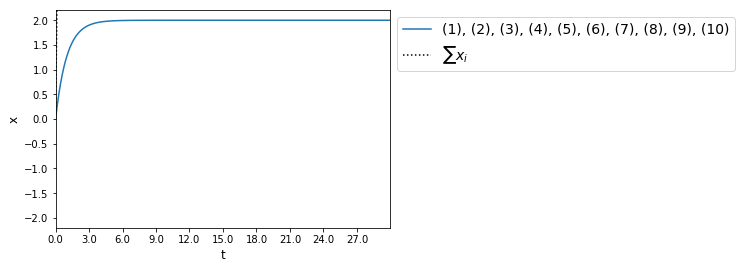

In [5]:
k = util.create_homogeneous_beta(num_individuals)
x = run_simulation(x0, mu, k, L, dt, sigma, T)

## One Leader

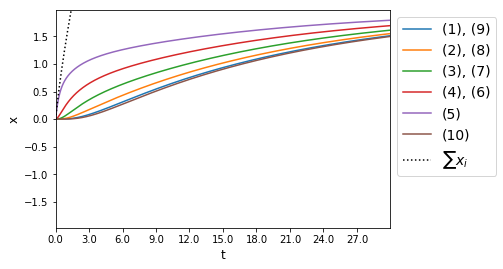

In [6]:
leader_indices = [5]
leader_betas = [1]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)

## Two Leaders

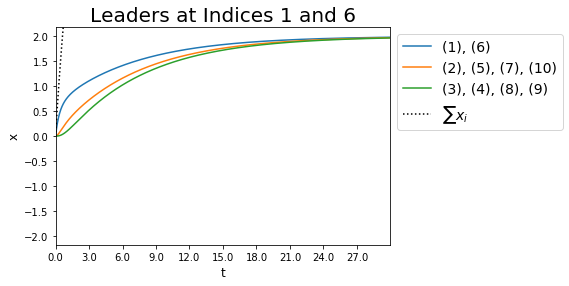

In [7]:
leader_indices = [1,6]
leader_betas = [1,1]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)
plt.title("Leaders at Indices 1 and 6", fontsize=title_fontsize)
plt.savefig("../Figures/measuresignal_circle16")

In [8]:
util.compute_totalnetwork_discrepancy_signalmeasuring(x,k,util.one_to_zero_indexing(leader_indices),L)

array([ 2127.35986346])

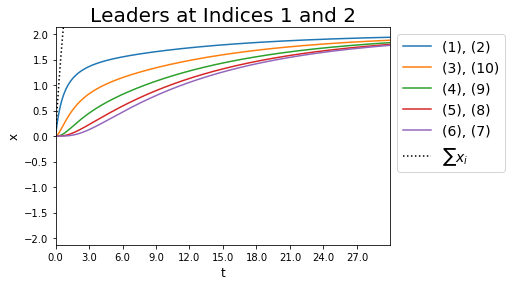

In [9]:
leader_indices = [1,2]
leader_betas = [1,1]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)
plt.title("Leaders at Indices 1 and 2", fontsize=title_fontsize)
plt.savefig("../Figures/measuresignal_circle12")

In [10]:
util.compute_totalnetwork_discrepancy_signalmeasuring(x,k,util.one_to_zero_indexing(leader_indices),L)

array([ 2563.89191543])

## Path Graph

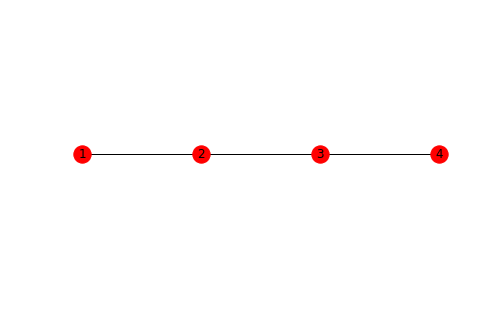

In [11]:
num_individuals = 4
L = util.create_line_graph(num_individuals)
util.draw_line_graph(L)
x0 = np.zeros([num_individuals, 1])
sigma = np.zeros([num_individuals, 1])
dt = 0.001
T = 30

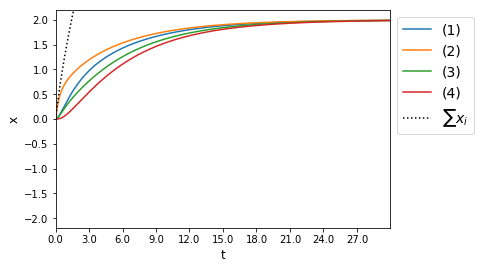

In [12]:
leader_indices = [2]
leader_betas = [1]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)

In [13]:
util.compute_totalnetwork_discrepancy_signalmeasuring(x,k,util.one_to_zero_indexing(leader_indices),L)

array([ 1639.55769946])

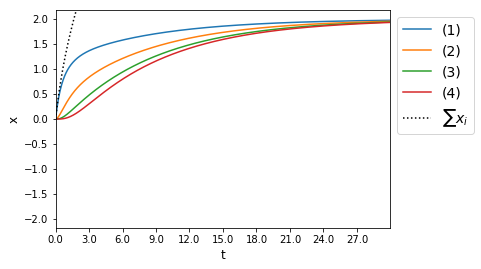

In [14]:
leader_indices = [1]
leader_betas = [1]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)

In [15]:
util.compute_totalnetwork_discrepancy_signalmeasuring(x,k,util.one_to_zero_indexing(leader_indices),L)

array([ 2073.99532235])

### Two Leaders

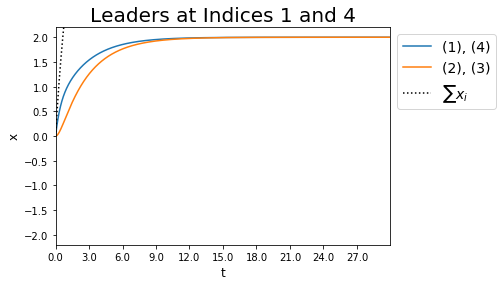

In [16]:
leader_indices = [1,4]
leader_betas = [1,1]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)
plt.title("Leaders at Indices 1 and 4", fontsize=title_fontsize)
plt.savefig("../Figures/measuresignal_line_14")

In [17]:
util.compute_totalnetwork_discrepancy_signalmeasuring(x,k,util.one_to_zero_indexing(leader_indices),L)

array([ 666.88912984])

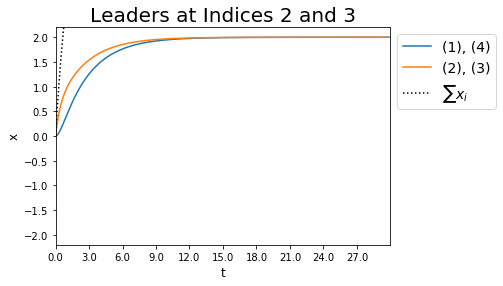

In [18]:
leader_indices = [2,3]
leader_betas = [1,1]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)
plt.title("Leaders at Indices 2 and 3", fontsize=title_fontsize)
plt.savefig("../Figures/measuresignal_line_23")

In [19]:
util.compute_totalnetwork_discrepancy_signalmeasuring(x,k,util.one_to_zero_indexing(leader_indices),L)

array([ 666.88912984])

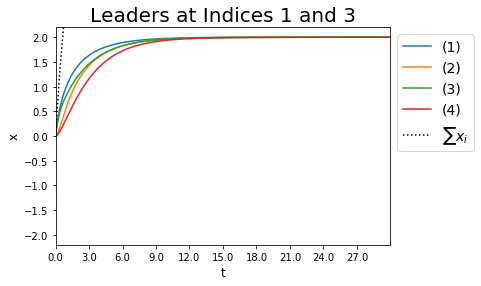

In [20]:
leader_indices = [1,3]
leader_betas = [1,1]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)
plt.title("Leaders at Indices 1 and 3", fontsize=title_fontsize)
plt.savefig("../Figures/measuresignal_line_13")

In [21]:
util.compute_totalnetwork_discrepancy_signalmeasuring(x,k,util.one_to_zero_indexing(leader_indices),L)

array([ 542.94598812])

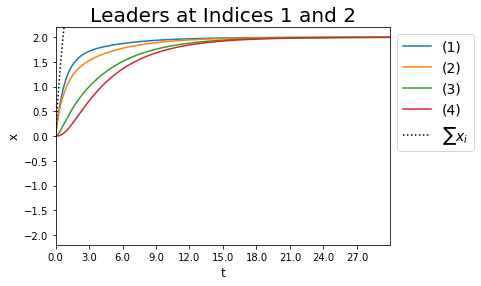

In [22]:
leader_indices = [1,2]
leader_betas = [1,1]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)
plt.title("Leaders at Indices 1 and 2", fontsize=title_fontsize)
plt.savefig("../Figures/measuresignal_line_12")

In [23]:
util.compute_totalnetwork_discrepancy_signalmeasuring(x,k,util.one_to_zero_indexing(leader_indices),L)

array([ 998.11709629])

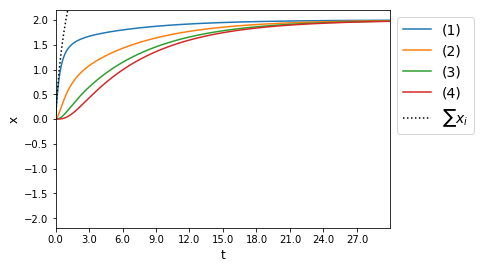

In [24]:
leader_indices = [1]
leader_betas = [2]
k = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)
x = run_simulation(x0, mu, k, L, dt, sigma, T)

In [25]:
util.compute_totalnetwork_discrepancy_signalmeasuring(x,k,util.one_to_zero_indexing(leader_indices),L)

array([ 2735.44359733])